In [1]:
## Imports

In [122]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [162]:
# data = pd.read_csv("data/dataset_mood_smartphone.csv").rename(columns={"Unnamed: 0": "index", "time": "date" })
# data = data.drop("index", axis=1)

# data['date'] = data['date'].str.split(" ").str.get(0)
# data["date"] = pd.to_datetime(data["date"])
# data.to_csv("data_new/data_processed.csv", index=False)

# data["month"] = data["date"].dt.month
# data["day"] = data["date"].dt.day
# data["day_of_week"] = data["date"].dt.day_of_week



# # check if nans
# # nans = data[data.isna().any(axis=1)]
# # nans

# # remove the nans
# data = data.dropna()
# data = data.drop(["index"], axis=1)


data = pd.read_csv("data_new/data_processed.csv")
data
# new_df = data[["variable", 'date', 'value']].rename(columns={"variable": "series", "date": "timestamp" })
# new_df["labels"] = ""
# new_df["timestamp"] = new_df["timestamp"].astype(str)
# new_df.to_csv("data/test_label_data.csv", index=False)

,id,date,variable,value
0,AS14.01,2014-02-26,mood,6.000
1,AS14.01,2014-02-26,mood,6.000
2,AS14.01,2014-02-26,mood,6.000
3,AS14.01,2014-02-26,mood,7.000
4,AS14.01,2014-02-27,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033


In [147]:


groups = data.groupby(data.variable)

all_dfs = []
names = ['mood',
  'appCat.utilities',
 'appCat.social',
 'circumplex.arousal',
 'screen',
 'appCat.office',
 'call',
 'appCat.other',
 'circumplex.valence',
 'appCat.unknown',
 'sms',
 'appCat.finance',
 'appCat.builtin',
 'appCat.communication',
 'activity',
 'appCat.weather',
 'appCat.entertainment',
 'appCat.game',
 'appCat.travel']

for name in names:
    df_temp = groups.get_group(name).drop(["variable"], axis=1)
    df_temp["date"] = pd.to_datetime(df_temp["date"])
    df_temp = df_temp.drop(["id"], axis=1)
    df_temp = df_temp.rename(columns={"value": f"{name}"})
    df_temp = df_temp.groupby(["date"]).mean()
    df_temp = df_temp.iloc[2:]
    all_dfs.append(df_temp)


In [163]:

# m = pd.concat(all_dfs, axis=1)m 
data_merged = all_dfs[0].join(all_dfs[1:])
# data_merged = data_merged.join(all_dfs[18])
data_merged.reset_index(inplace=True)
data_merged.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
date,96,2014-04-20 20:15:00,2014-03-04 00:00:00,2014-03-27 18:00:00,2014-04-20 12:00:00,2014-05-15 06:00:00,2014-06-08 00:00:00,NaN
mood,96.0,6.961717,6.066667,6.830461,7.0,7.109927,8.0,0.30534
appCat.utilities,74.0,16.036746,1.336333,9.43325,13.703152,18.583582,77.645061,11.939875
appCat.social,83.0,75.689902,17.2345,60.486969,68.94006,81.325929,220.565,33.488677
circumplex.arousal,96.0,-0.071204,-1.5,-0.20257,-0.085227,0.103846,0.666667,0.320577
screen,85.0,83.023816,31.575519,67.420138,76.426536,91.902686,161.599714,25.147151
appCat.office,58.0,32.953085,4.292484,9.242709,16.029623,29.29395,312.443542,53.557937
call,93.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
appCat.other,85.0,21.870154,6.214,11.941769,17.556908,29.015449,85.350778,13.676003
circumplex.valence,95.0,0.703396,0.1875,0.602632,0.674699,0.819001,2.0,0.234468


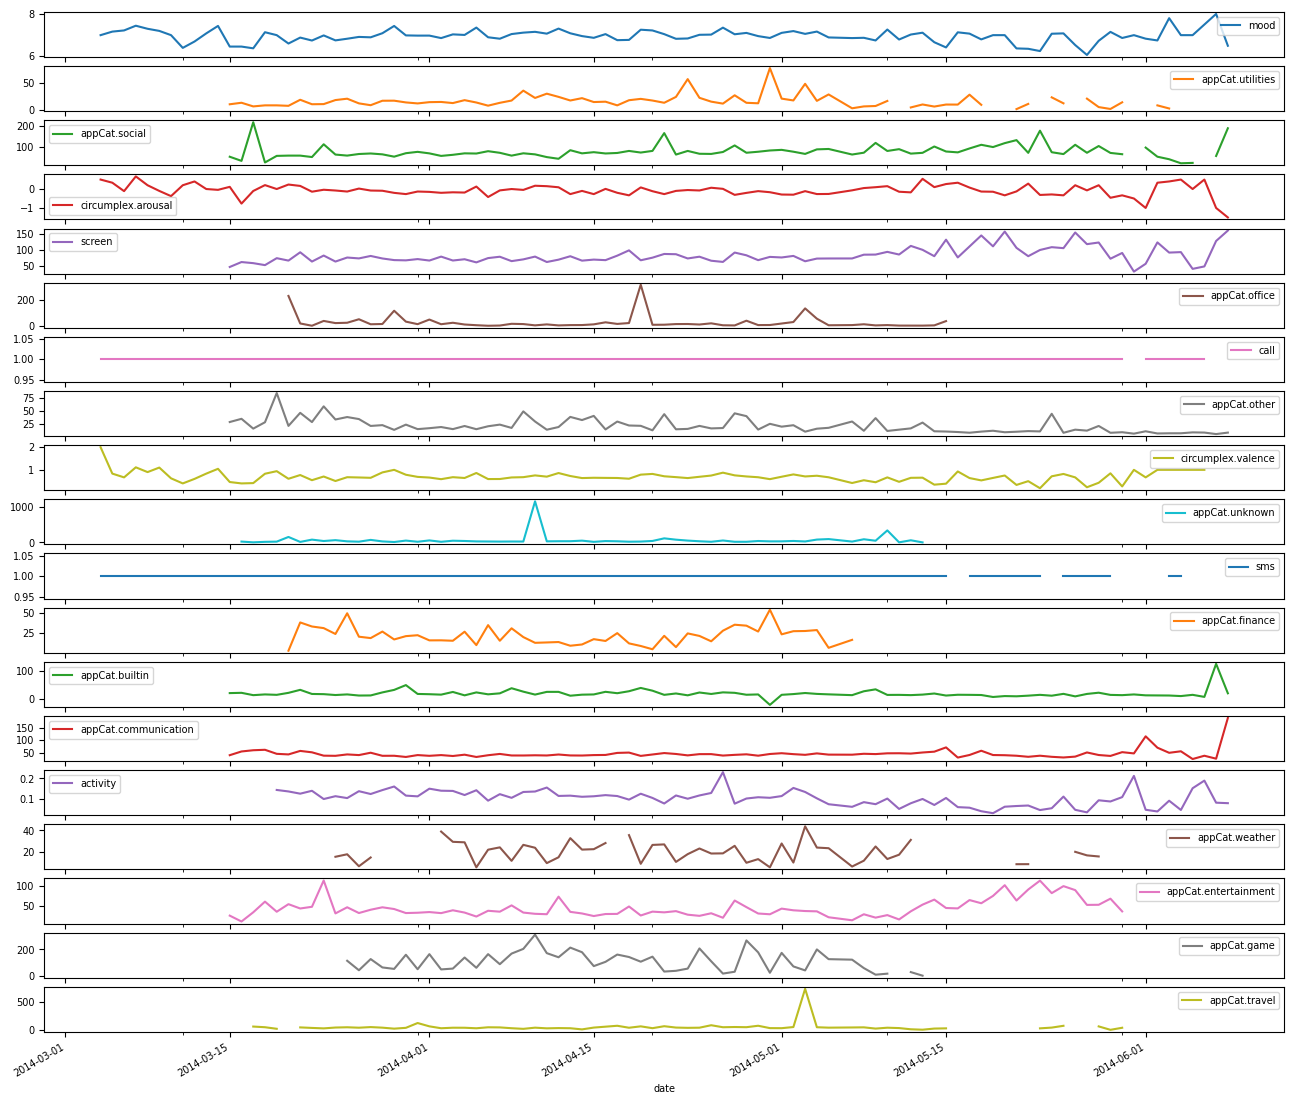

In [149]:
mpl.rcParams['figure.figsize'] = (16, 15)
mpl.rcParams['axes.grid'] = False

date_time = pd.to_datetime(data_merged["date"], format='%Y-%m-%d')
plot_features = data_merged[names]
plot_features.index = date_time

mpl.rcParams["font.size"] = 7
_ = plot_features.plot(subplots=True)

In [150]:
data_merged.iloc[:, 2:] = np.where(data_merged.iloc[:, 2:] > 720, np.nan, data_merged.iloc[:, 2:])

no_neg = ['mood',
  'appCat.utilities',
 'appCat.social',
 'screen',
 'appCat.office',
 'call',
 'appCat.other',
 'appCat.unknown',
 'sms',
 'appCat.finance',
 'appCat.builtin',
 'appCat.communication',
 'activity',
 'appCat.weather',
 'appCat.entertainment',
 'appCat.game',
 'appCat.travel']

data_merged[no_neg] = np.where(data_merged[no_neg] < 0, np.nan, data_merged[no_neg])

data_merged["call"].fillna(0, inplace=True)
data_merged["sms"].fillna(0, inplace=True)

data_merged.isnull().sum()

date                     0
mood                     0
appCat.utilities        22
appCat.social           13
circumplex.arousal       0
screen                  11
appCat.office           38
call                     0
appCat.other            11
circumplex.valence       1
appCat.unknown          33
sms                      0
appCat.finance          46
appCat.builtin          12
appCat.communication    11
activity                15
appCat.weather          47
appCat.entertainment    19
appCat.game             48
appCat.travel           30
dtype: int64

In [151]:
## create sans nans 1

data_merged["date"] = pd.to_datetime(data_merged["date"])

sans_nans_1 = data_merged.set_index('date')

nans = ['appCat.utilities', 'appCat.social','screen', 'appCat.office', 'appCat.other', 'circumplex.valence',
       'appCat.unknown', 'appCat.finance', 'appCat.builtin','appCat.communication', 'activity', 'appCat.weather', 
       'appCat.entertainment','appCat.game', 'appCat.travel']

sans_nans_1[nans] = sans_nans_1[nans].interpolate(method='time', limit_direction='both')
# merged_next.ffill(inplace=True) # only to fill the last target prediction that was removed when shifting ## alleen gebruikt bij merged_next en niet merged
sans_nans_1.to_csv("data_new/sans_nans_1.csv")
sans_nans_1


## create sans nans 2
sans_nans_2 = data_merged.set_index('date')
sans_nans_2 = sans_nans_2.ffill().bfill()

sans_nans_2.to_csv("data_new/sans_nans_2.csv")
sans_nans_2

,mood,appCat.utilities,appCat.social,circumplex.arousal,screen,appCat.office,call,appCat.other,circumplex.valence,appCat.unknown,sms,appCat.finance,appCat.builtin,appCat.communication,activity,appCat.weather,appCat.entertainment,appCat.game,appCat.travel
date,,,,,,,,,,,,,,,,,,,
2014-03-04,7.000000,10.32925,49.583000,0.500000,46.204192,228.138000,1.0,29.457417,2.000000,24.665250,1.0,22.100000,20.231540,41.079066,0.143895,15.070000,26.808108,115.795333,59.037000
2014-03-05,7.166667,10.32925,49.583000,0.333333,46.204192,228.138000,1.0,29.457417,0.833333,24.665250,1.0,22.100000,20.231540,41.079066,0.143895,15.070000,26.808108,115.795333,59.037000
2014-03-06,7.222222,10.32925,49.583000,-0.111111,46.204192,228.138000,1.0,29.457417,0.666667,24.665250,1.0,22.100000,20.231540,41.079066,0.143895,15.070000,26.808108,115.795333,59.037000
2014-03-07,7.444444,10.32925,49.583000,0.666667,46.204192,228.138000,1.0,29.457417,1.111111,24.665250,1.0,22.100000,20.231540,41.079066,0.143895,15.070000,26.808108,115.795333,59.037000
2014-03-08,7.300000,10.32925,49.583000,0.200000,46.204192,228.138000,1.0,29.457417,0.900000,24.665250,1.0,22.100000,20.231540,41.079066,0.143895,15.070000,26.808108,115.795333,59.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-04,7.000000,2.53620,17.234500,0.500000,93.283250,44.738625,1.0,7.754800,1.000000,2.690667,1.0,21.777667,9.522432,56.443329,0.046385,15.360083,21.205000,4.693000,37.594571
2014-06-05,7.000000,2.53620,19.107111,0.000000,40.196424,44.738625,1.0,9.472000,1.000000,2.690667,0.0,21.777667,13.994216,25.914081,0.152343,15.360083,21.205000,4.693000,75.245667
2014-06-06,7.500000,2.07200,19.107111,0.500000,47.953193,44.738625,1.0,9.103500,1.000000,2.690667,0.0,21.777667,6.568736,38.884636,0.189476,15.360083,21.205000,4.693000,75.245667


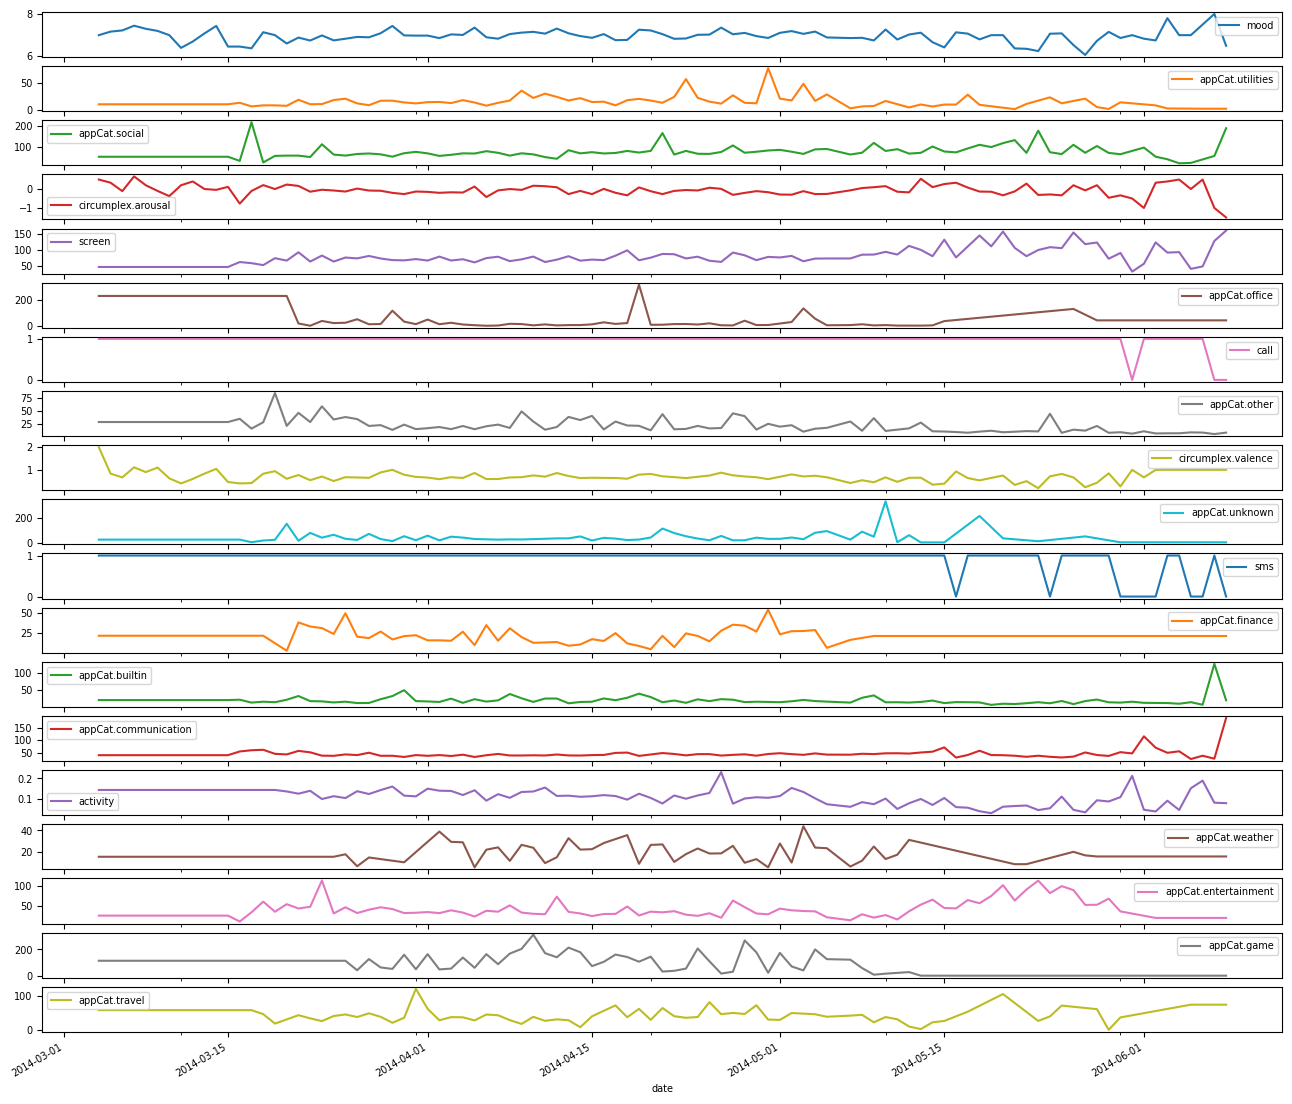

In [152]:

plot_features = sans_nans_1[names]
plot_features.index = date_time

mpl.rcParams["font.size"] = 7
_ = plot_features.plot(subplots=True)

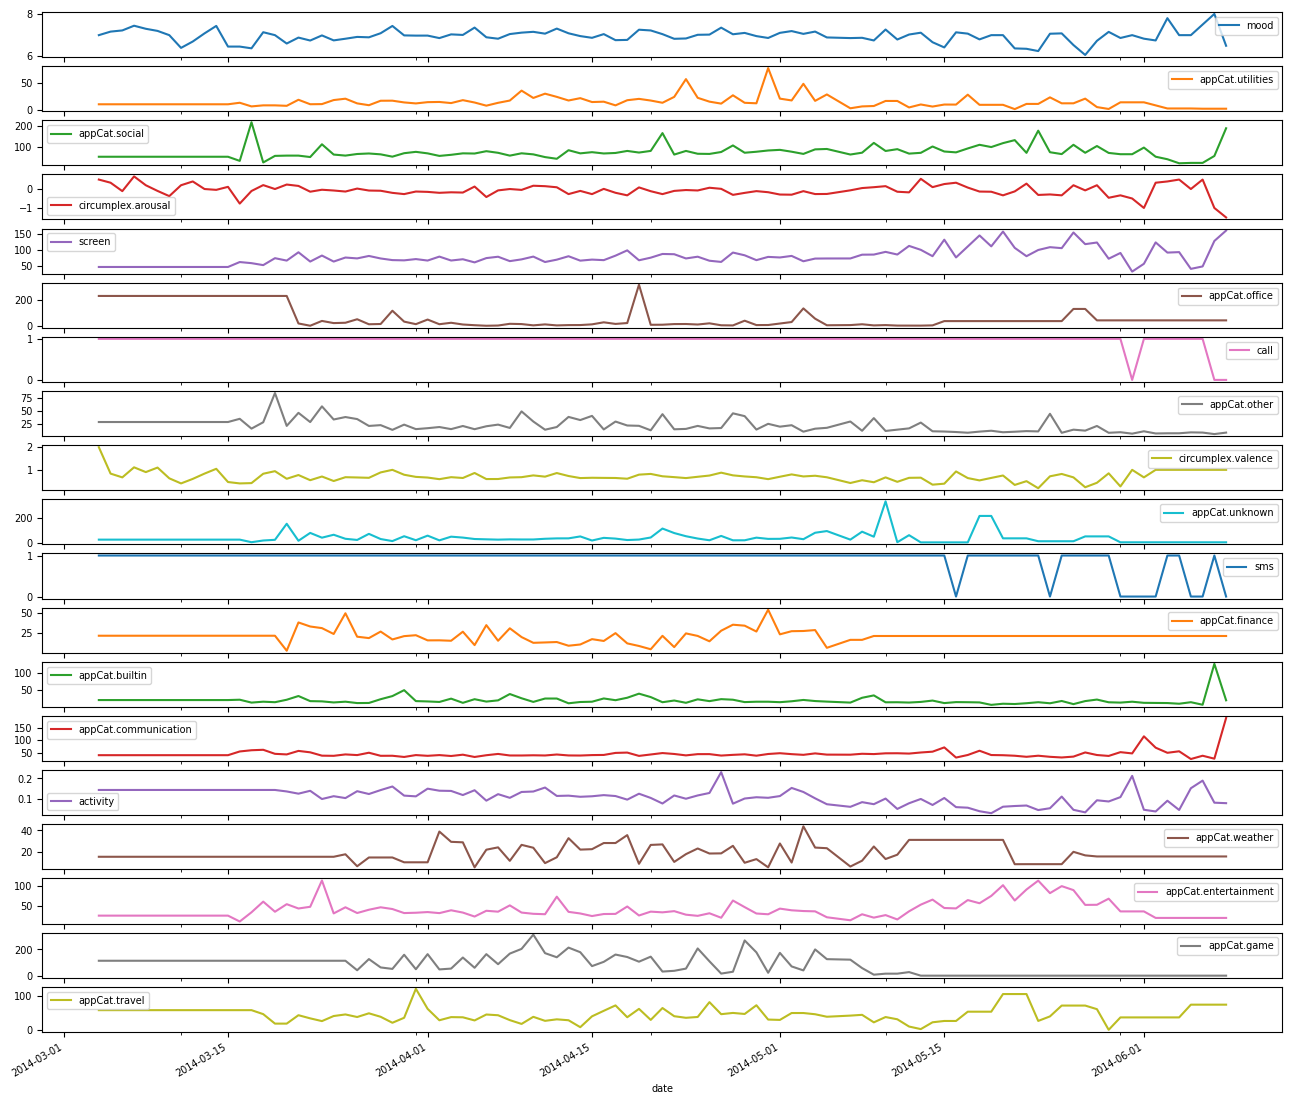

In [153]:
plot_features = sans_nans_2[names]
plot_features.index = date_time

mpl.rcParams["font.size"] = 7
_ = plot_features.plot(subplots=True)

<Axes: xlabel='id'>

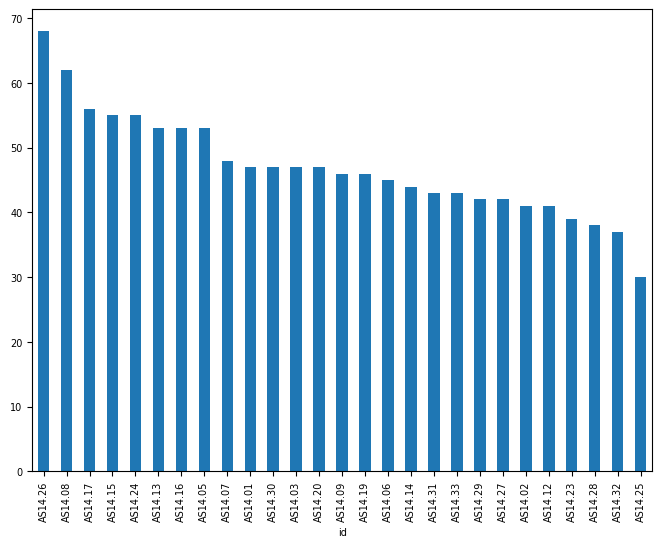

In [77]:
fig, ax = plt.subplots(figsize=(8,6))
data_merged['id'].value_counts().plot.bar()

In [ ]:
# plot value pp in the same plot per variable

In [7]:
## averages
# aggregation_functions = {'value': 'mean'}
# aggregations_functions_2 = {'mood_avg' : 'mean', 'utilities_avg' : 'mean', 'social_avg' : 'mean', 'arousal_avg' : 'mean', 'screen_avg' : 'mean', 'office_avg' : 'mean',
#        'call_avg' : 'mean', 'other_avg' : 'mean', 'valence_avg' : 'mean', 'unknown_avg' : 'mean', 'sms_avg' : 'mean', 'finance_avg': 'mean',
#        'builtin_avg' : 'mean', 'communication_avg' : 'mean', 'activity_avg' : 'mean', 'weather_avg' : 'mean', 'entertainment_avg' : 'mean',
#        'game_avg' : 'mean', 'travel_avg' : 'mean', 'mood_avg_next' : 'mean'}


# avg = data.groupby([data['id'], data["date"]]).aggregate(aggregation_functions)
# # label_avg = label_data.groupby([label_data['id'], label_data["day"]]).aggregate(aggregation_functions)
# # label_avg = label_avg.rename(columns={"value": "mood_avg"})
# avg

In [43]:
# groups = data.groupby(data.variable)

# dfs = []
# names = ['mood',
#   'appCat.utilities',
#  'appCat.social',
#  'circumplex.arousal',
#  'screen',
#  'appCat.office',
#  'call',
#  'appCat.other',
#  'circumplex.valence',
#  'appCat.unknown',
#  'sms',
#  'appCat.finance',
#  'appCat.builtin',
#  'appCat.communication',
#  'activity',
#  'appCat.weather',
#  'appCat.entertainment',
#  'appCat.game',
#  'appCat.travel']

# names2 = ['mood',
#  'utilities',
#  'social',
#  'arousal',
#  'screen',
#  'office',
#  'call',
#  'other',
#  'valence',
#  'unknown',
#  'sms',
#  'finance',
#  'builtin',
#  'communication',
#  'activity',
#  'weather',
#  'entertainment',
#  'game',
#  'travel']

# for t in names:
#     df = groups.get_group(t).drop(["variable"], axis=1)
#     df["date"] = pd.to_datetime(df["date"])
#     # df = df.rename(columns={"value": f"{t}"})
#     dfs.append(df)

# dfs[0].groupby([dfs[0]['date'], dfs[0]["id"]]).aggregate(aggregation_functions)


In [154]:
# merged = ""
# for i in range(19):
#     # var_avg = dfs[i].groupby([dfs[i]['id'], dfs[i]["date"]]).aggregate(aggregation_functions)
#     var_avg = dfs[i].groupby([dfs[i]['date'], dfs[i]["id"]]).aggregate(aggregation_functions)
#     var_avg = var_avg.rename(columns={"value": f"{names2[i]}_avg"})
#     if i == 0:
#         merged = var_avg
#     else:
#         merged = merged.join(var_avg)

# merged

# merged = merged.reset_index()

# # merged["date"] = pd.to_datetime(data["date"])


# merged["month"] = merged["date"].dt.month
# merged["day"] = merged["date"].dt.day
# merged["day_of_week"] = merged["date"].dt.day_of_week

# # # make val 0 when no call or sms has been made
# merged["call_avg"].fillna(0, inplace=True)
# merged["sms_avg"].fillna(0, inplace=True)


# merged.set_index(["date", "id"], inplace=True)
# # merged.set_index(["date"], inplace=True)
# merged.to_csv("data_new/merged.csv")
# merged

In [4]:
# merged = pd.read_csv("data_new/merged.csv")
# merged_next = pd.read_csv("data_new/merged_next.csv")
# feature_merged = merged_next.loc[:, merged_next.columns != 'mood_avg_next']

# merged_sans_nans_1 = pd.read_csv("data_new/merged_sans_nans_1.csv")
# merged_sans_nans_1_next = pd.read_csv("data_new/merged_sans_nans_1_next.csv")
# feature_merged_sans_nans_1 = merged_sans_nans_1_next.loc[:, merged_sans_nans_1_next.columns != 'mood_avg_next']

# merged_sans_nans_2 = pd.read_csv("data_new/merged_sans_nans_2.csv")
# merged_sans_nans_2_next = pd.read_csv("data_new/merged_sans_nans_2_next.csv")
# feature_merged_sans_nans_2 = merged_sans_nans_2_next.loc[:, merged_sans_nans_2_next.columns != 'mood_avg_next']


In [64]:
# aggregations_functions_2 = {'mood_avg' : 'mean', 'utilities_avg' : 'mean', 'social_avg' : 'mean', 'arousal_avg' : 'mean', 'screen_avg' : 'mean', 'office_avg' : 'mean',
#        'call_avg' : 'mean', 'other_avg' : 'mean', 'valence_avg' : 'mean', 'unknown_avg' : 'mean', 'sms_avg' : 'mean', 'finance_avg': 'mean',
#        'builtin_avg' : 'mean', 'communication_avg' : 'mean', 'activity_avg' : 'mean', 'weather_avg' : 'mean', 'entertainment_avg' : 'mean',
#        'game_avg' : 'mean', 'travel_avg' : 'mean'}

In [68]:
# new = merged_sans_nans_1.groupby([merged_sans_nans_1["date"]]).aggregate(aggregations_functions_2)
# new.reset_index(inplace= True)

# new = new.drop([0,1], axis= 0)
# new.reset_index(inplace= True, drop = True)
# new.head(10)


,date,mood_avg,utilities_avg,social_avg,arousal_avg,screen_avg,office_avg,call_avg,other_avg,valence_avg,unknown_avg,sms_avg,finance_avg,builtin_avg,communication_avg,activity_avg,weather_avg,entertainment_avg,game_avg,travel_avg
0,2014-03-04,7.000000,13.062,33.491833,0.500000,55.066533,17.086,1.0,26.106875,2.000000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
1,2014-03-05,7.166667,13.062,33.491833,0.333333,55.066533,17.086,0.5,26.106875,0.833333,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
2,2014-03-06,7.225000,13.062,33.491833,-0.050000,55.066533,17.086,0.5,26.106875,0.675000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
3,2014-03-07,7.450000,13.062,33.491833,0.675000,55.066533,17.086,0.0,26.106875,1.100000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
4,2014-03-08,7.300000,13.062,33.491833,0.200000,55.066533,17.086,0.0,26.106875,0.900000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
5,2014-03-09,7.200000,13.062,33.491833,-0.100000,55.066533,17.086,0.5,26.106875,1.100000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
6,2014-03-10,7.066667,13.062,33.491833,-0.166667,55.066533,17.086,0.0,26.106875,0.633333,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
7,2014-03-11,6.400000,13.062,33.491833,0.200000,55.066533,17.086,0.0,26.106875,0.400000,25.749571,0.5,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
8,2014-03-12,6.700000,13.062,33.491833,0.400000,55.066533,17.086,0.0,26.106875,0.600000,25.749571,0.0,8.0384,14.101000,47.864667,0.168068,3.02,36.754,31.647,116.122273
9,2014-03-13,7.212500,13.062,138.941958,-0.437500,46.098861,17.086,0.5,41.569419,0.962500,25.749571,0.5,8.0384,7.774617,39.001318,0.168068,3.02,36.754,31.647,116.122273


In [187]:
sans_nans_1 = pd.read_csv("data_new/sans_nans_1.csv")

new_2 = pd.DataFrame()
amount_of_days = 6

for i in sans_nans_1.index:
    new_row = sans_nans_1.iloc[i:i + amount_of_days].drop("date", axis = 1).mean()
    new_row = new_row.to_frame().T
    if len(new_2) == 0:
        new_2 = new_row
    elif i == 90:
        break
    else:
        new_2 = pd.concat([new_2, new_row])
    # new_2["label"].iloc[i] = sans_nans_1["mood"].iloc[i + amount_of_days]
   
new_2.reset_index(inplace = True, drop = True)

#laatste column toevoegen, mood van de volgende dag 
new_2["label"] = sans_nans_1["mood"].iloc[6:].reset_index(drop = True)
# new_2["label"] = new_2["label"].shift(-6)

# new_2.fillna(method='ffill', inplace= True)
# new_2.ffill(inplace= True)
new_2
# sans_nans_1["mood"].iloc[6:].reset_index(drop = True)

new_2.to_csv("data_new/instance_based_df_2.csv", index = False)   

In [212]:
## set target label

# # merged.set_index(["date"], inplace=True)
# # Identify indices with multiple rows
# multi_row_indices = merged.groupby(level=0).size()[lambda x: x > 1].index


# # Calculate the average for the specific column
# avg_col = merged['mood_avg'].groupby(level=0).mean()

# merged["mood_avg_next"] = None

# for i, date in enumerate(avg_col.index):
#     if date in multi_row_indices:
#         merged.loc[date, "mood_avg_next"] = avg_col.iloc[i+1]
#     else:
#         if i < len(avg_col) - 1:
#             merged.loc[date, 'mood_avg_next'] = avg_col.iloc[i+1]

# merged.to_csv("data_new/merged_next.csv")
# merged.head(10)


In [224]:



## create sans nans 1

# merged_next["date"] = pd.to_datetime(merged["date"])

# merged_next = merged_next.set_index('date')

# nans = ['utilities_avg', 'social_avg','screen_avg', 'office_avg', 'other_avg', 'valence_avg',
#        'unknown_avg', 'finance_avg', 'builtin_avg','communication_avg', 'activity_avg', 'weather_avg', 
#        'entertainment_avg','game_avg', 'travel_avg']

# merged_next[nans] = merged_next[nans].interpolate(method='time').bfill()
# merged_next.ffill(inplace=True) # only to fill the last target prediction that was removed when shifting ## alleen gebruikt bij merged_next en niet merged
# merged_next.to_csv("data_new/merged_sans_nans_1_next.csv")
# merged


## create sans nans 2

# merged_next["date"] = pd.to_datetime(merged_next["date"])

# merged_next = merged_next.set_index('date')

# merged_sans_nans_2 = merged_next.ffill().bfill()
# merged_sans_nans_2.isna().sum()
# # m.isna().sum()
# merged_sans_nans_2.to_csv("data_new/merged_sans_nans_2_next.csv")

In [226]:
# merged_sans_nans_1.set_index('date', inplace=True)
merged_sans_nans_1.compare(merged_sans_nans_2, keep_shape=True,  result_names=("interpolate", "ffill")) # show that there is a difference between interpolate/bbfill and ffill/bfill but mostly similair


date                id          mood_avg       utilities_avg  \
     interpolate ffill interpolate ffill interpolate ffill   interpolate   
0            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
2            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
3            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
4            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
...          ...   ...         ...   ...         ...   ...           ...   
1263         NaN   NaN         NaN   NaN         NaN   NaN      2.381467   
1264         NaN   NaN         NaN   NaN         NaN   NaN      2.226733   
1265         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1266         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1267         NaN   NaN         NaN   NaN         NaN   NaN           NaN   

              social_avg             ...    game_avg        travel_avg  \
       ffill interpolate      ffill  ... interpolate ffill interpolate   
0        NaN         NaN        NaN  ...         NaN   NaN         NaN   
1        NaN         NaN        NaN  ...         NaN   NaN         NaN   
2        NaN         NaN        NaN  ...         NaN   NaN         NaN   
3        NaN         NaN        NaN  ...         NaN   NaN         NaN   
4        NaN         NaN        NaN  ...         NaN   NaN         NaN   
...      ...         ...        ...  ...         ...   ...         ...   
1263  2.5362         NaN        NaN  ...         NaN   NaN   68.970484   
1264  2.5362         NaN        NaN  ...         NaN   NaN         NaN   
1265     NaN   36.266056  19.107111  ...         NaN   NaN         NaN   
1266     NaN         NaN        NaN  ...         NaN   NaN         NaN   
1267     NaN         NaN        NaN  ...         NaN   NaN         NaN   

                      month               day       day_of_week        
          ffill interpolate ffill interpolate ffill interpolate ffill  
0           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
2           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
3           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
4           NaN         NaN   NaN         NaN   NaN         NaN   NaN  
...         ...         ...   ...         ...   ...         ...   ...  
1263  37.594571         NaN   NaN         NaN   NaN         NaN   NaN  
1264        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1265        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1266        NaN         NaN   NaN         NaN   NaN         NaN   NaN  
1267        NaN         NaN   NaN         NaN   NaN         NaN   NaN  

[1268 rows x 48 columns]

In [227]:
merged_sans_nans_1_next.compare(merged_sans_nans_2_next, keep_shape=True,  result_names=("interpolate", "ffill")) # show that there is a difference between interpolate/bbfill and ffill/bfill but mostly similair

date                id          mood_avg       utilities_avg  \
     interpolate ffill interpolate ffill interpolate ffill   interpolate   
0            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
2            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
3            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
4            NaN   NaN         NaN   NaN         NaN   NaN           NaN   
...          ...   ...         ...   ...         ...   ...           ...   
1263         NaN   NaN         NaN   NaN         NaN   NaN      2.381467   
1264         NaN   NaN         NaN   NaN         NaN   NaN      2.226733   
1265         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1266         NaN   NaN         NaN   NaN         NaN   NaN           NaN   
1267         NaN   NaN         NaN   NaN         NaN   NaN           NaN   

              social_avg             ...  travel_avg                  month  \
       ffill interpolate      ffill  ... interpolate      ffill interpolate   
0        NaN         NaN        NaN  ...         NaN        NaN         NaN   
1        NaN         NaN        NaN  ...         NaN        NaN         NaN   
2        NaN         NaN        NaN  ...         NaN        NaN         NaN   
3        NaN         NaN        NaN  ...         NaN        NaN         NaN   
4        NaN         NaN        NaN  ...         NaN        NaN         NaN   
...      ...         ...        ...  ...         ...        ...         ...   
1263  2.5362         NaN        NaN  ...   68.970484  37.594571         NaN   
1264  2.5362         NaN        NaN  ...         NaN        NaN         NaN   
1265     NaN   36.266056  19.107111  ...         NaN        NaN         NaN   
1266     NaN         NaN        NaN  ...         NaN        NaN         NaN   
1267     NaN         NaN        NaN  ...         NaN        NaN         NaN   

                   day       day_of_week       mood_avg_next        
     ffill interpolate ffill interpolate ffill   interpolate ffill  
0      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
2      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
3      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
4      NaN         NaN   NaN         NaN   NaN           NaN   NaN  
...    ...         ...   ...         ...   ...           ...   ...  
1263   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1264   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1265   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1266   NaN         NaN   NaN         NaN   NaN           NaN   NaN  
1267   NaN         NaN   NaN         NaN   NaN           NaN   NaN  

[1268 rows x 50 columns]

In [228]:

# merged_sans_nans_1

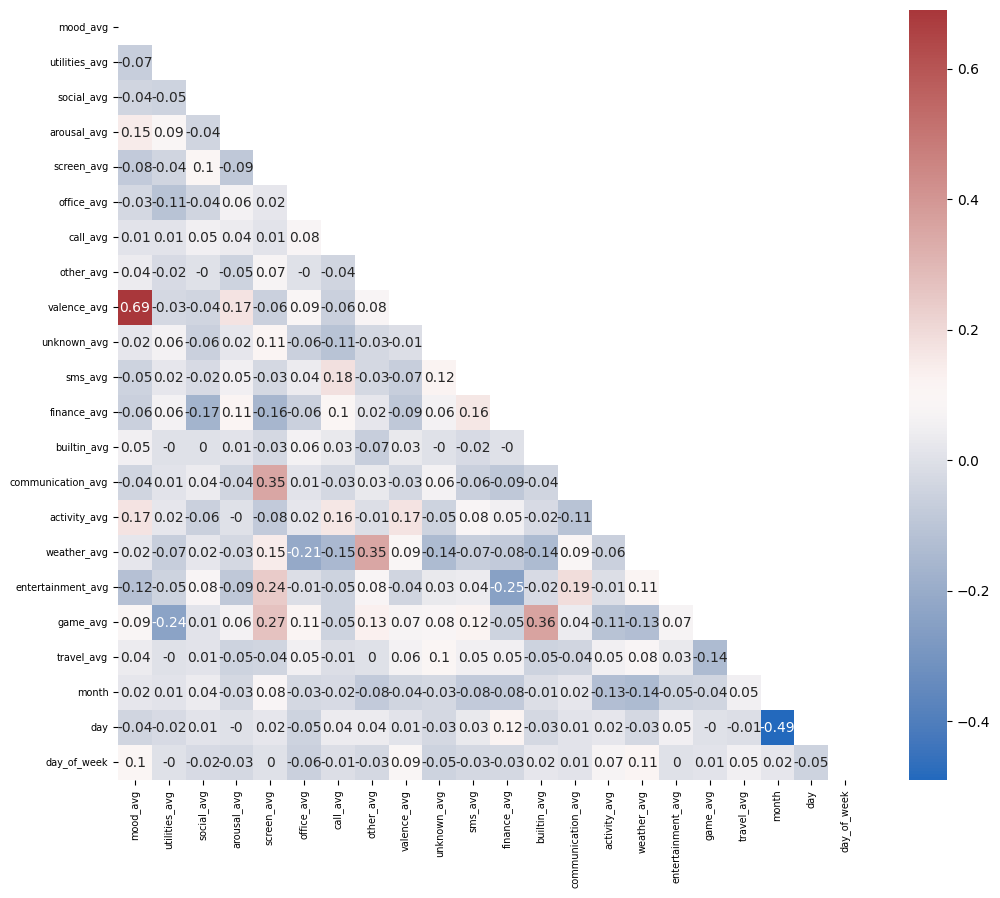

In [121]:
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10))

mat = merged.iloc[: , 2:].corr().round(2)
mat2 = merged_sans_nans_1.iloc[: , 2:].corr().round(2)
mat3 = merged_sans_nans_2.iloc[: , 2:].corr().round(2)

mask = np.triu(np.ones_like(mat, dtype=bool))
mask2 = np.triu(np.ones_like(mat2, dtype=bool))
mask3 = np.triu(np.ones_like(mat3, dtype=bool))

plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

# standard
sns.heatmap(mat, annot=True, cmap="vlag", mask=mask)
plt.show()


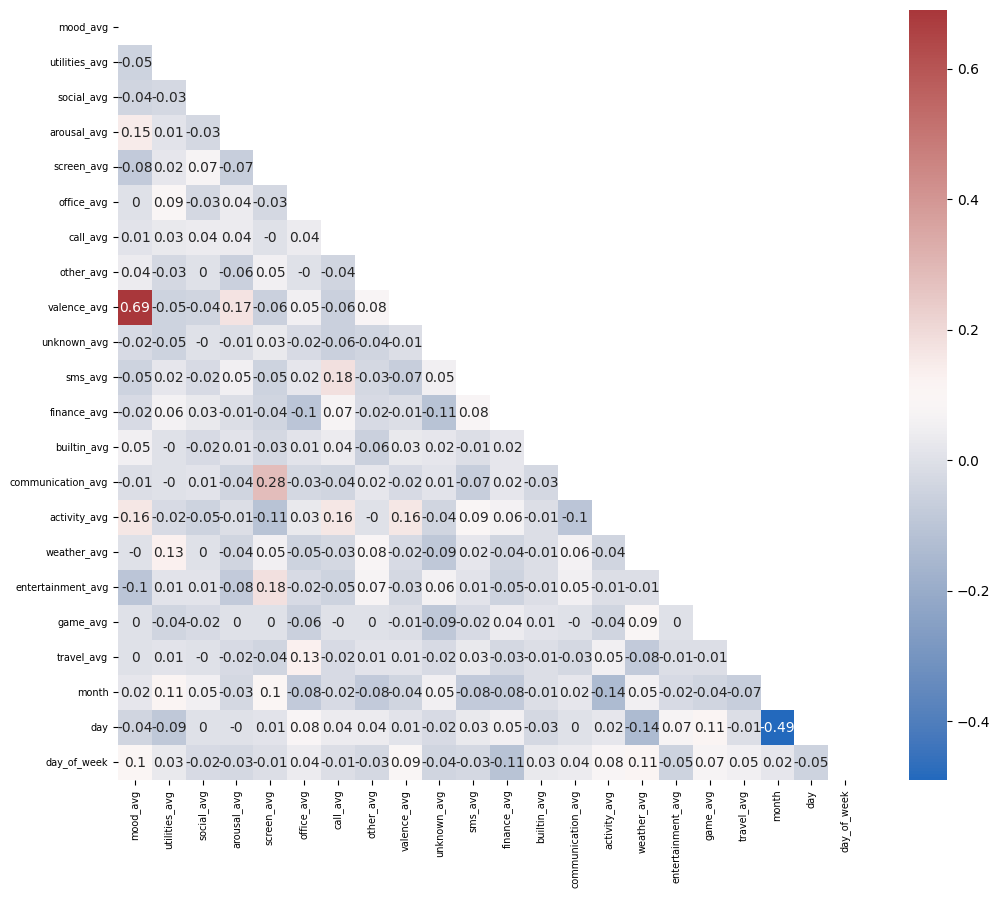

In [124]:
# sans nans 1 (interpolate)
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

sns.heatmap(mat2, annot=True, cmap = "vlag", mask=mask2)

plt.show()


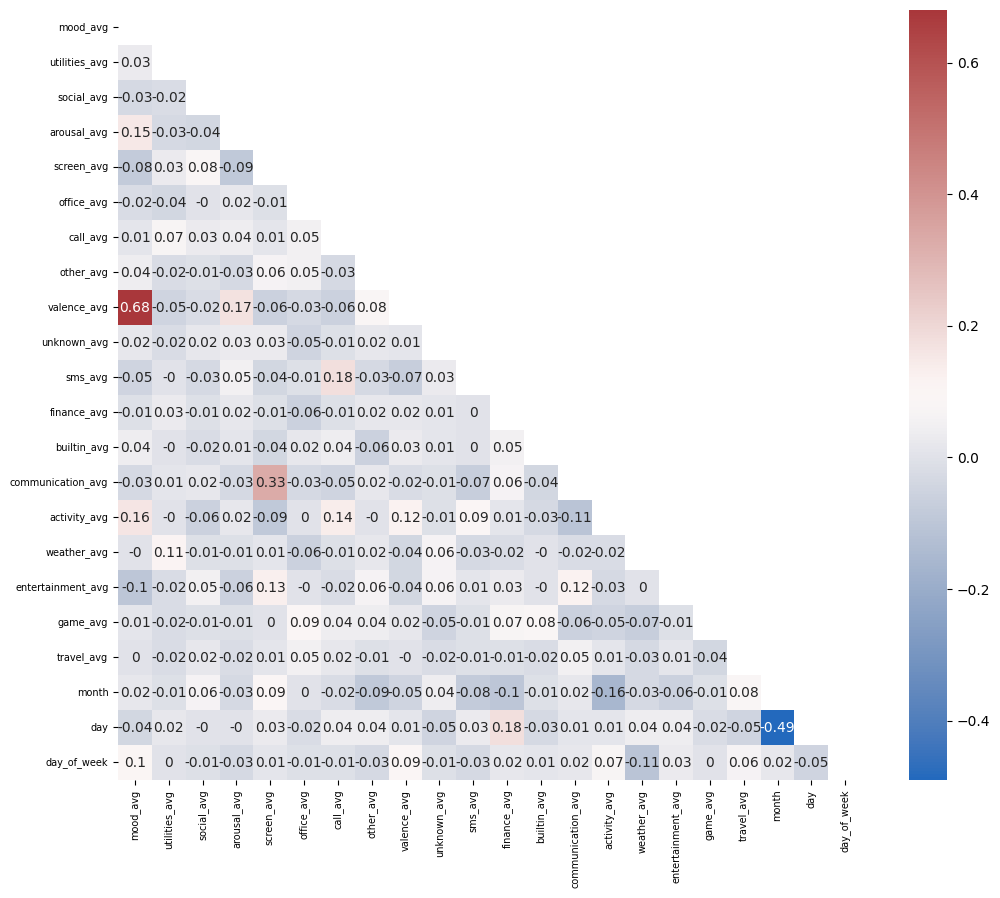

In [125]:
# sans nans 2 (forward fill)
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(fontsize = 7) 
plt.yticks(fontsize = 7) 

sns.heatmap(mat3, annot=True, cmap = "vlag", mask=mask3)
plt.show()

In [ ]:
# hierboven zien we negatieve correlatie tussen tijd op scherm en communicatie apps en activiteit en positieve correlatie tussen valence en arousal
# welke corra=elaties nog meerr??


In [260]:
merged = pd.read_csv("data_new/merged.csv")
merged_next = pd.read_csv("data_new/merged_next.csv")
feature_merged = merged_next.loc[:, merged_next.columns != 'mood_avg_next']

merged_sans_nans_1 = pd.read_csv("data_new/merged_sans_nans_1.csv")
merged_sans_nans_1_next = pd.read_csv("data_new/merged_sans_nans_1_next.csv")
feature_merged_sans_nans_1 = merged_sans_nans_1_next.loc[:, merged_sans_nans_1_next.columns != 'mood_avg_next']

merged_sans_nans_2 = pd.read_csv("data_new/merged_sans_nans_2.csv")
merged_sans_nans_2_next = pd.read_csv("data_new/merged_sans_nans_2_next.csv")
feature_merged_sans_nans_2 = merged_sans_nans_2_next.loc[:, merged_sans_nans_2_next.columns != 'mood_avg_next']

merged_sans_nans_1_next["mood_avg_next"].round().unique()
avg_all = merged_next.loc[:, 'mood_avg'].mean()
filtered = merged_next.loc[merged_next["mood_avg_next"] < avg_all]
filtered


,date,id,mood_avg,utilities_avg,social_avg,arousal_avg,screen_avg,office_avg,call_avg,other_avg,...,communication_avg,activity_avg,weather_avg,entertainment_avg,game_avg,travel_avg,month,day,day_of_week,mood_avg_next
0,2014-02-26,AS14.01,6.250000,NaN,NaN,-0.250000,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,26,2,6.333333
13,2014-03-10,AS14.08,6.800000,NaN,NaN,-1.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,10,0,6.400000
14,2014-03-10,AS14.17,7.333333,NaN,NaN,0.666667,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,10,0,6.400000
15,2014-03-11,AS14.08,6.600000,NaN,NaN,0.400000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,11,1,6.700000
16,2014-03-11,AS14.17,6.200000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,11,1,6.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2014-05-29,AS14.33,7.000000,1.5995,198.880222,-1.333333,118.978033,NaN,1.0,9.734000,...,54.388125,0.169354,NaN,68.369,NaN,0.939,5,29,3,6.866667
1258,2014-05-31,AS14.24,7.000000,NaN,NaN,1.000000,31.575519,NaN,0.0,7.019000,...,48.038154,0.212520,NaN,NaN,NaN,NaN,5,31,5,6.833333
1259,2014-05-31,AS14.33,7.000000,NaN,NaN,-2.000000,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,31,5,6.833333
1260,2014-06-01,AS14.24,6.833333,NaN,94.996000,-1.000000,56.324955,NaN,1.0,11.581286,...,115.465700,0.047363,NaN,NaN,NaN,NaN,6,1,6,6.750000


              precision    recall  f1-score   support

         6.0       0.44      0.44      0.44         9
         7.0       0.97      0.98      0.97       242
         8.0       0.50      0.33      0.40         3

    accuracy                           0.95       254
   macro avg       0.64      0.58      0.61       254
weighted avg       0.95      0.95      0.95       254



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

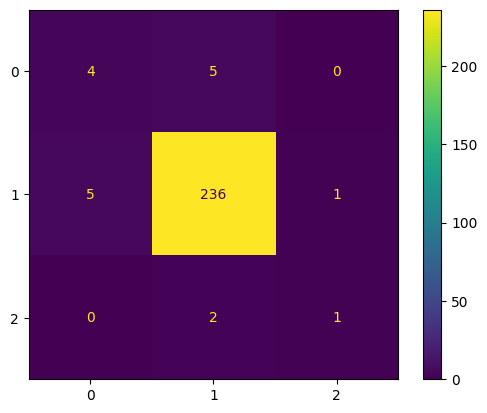

In [236]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

labels = merged_next["mood_avg_next"].round()
X = feature_merged.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

              precision    recall  f1-score   support

         6.0       0.86      0.67      0.75         9
         7.0       0.98      1.00      0.99       242
         8.0       1.00      0.33      0.50         3

    accuracy                           0.98       254
   macro avg       0.95      0.67      0.75       254
weighted avg       0.98      0.98      0.98       254



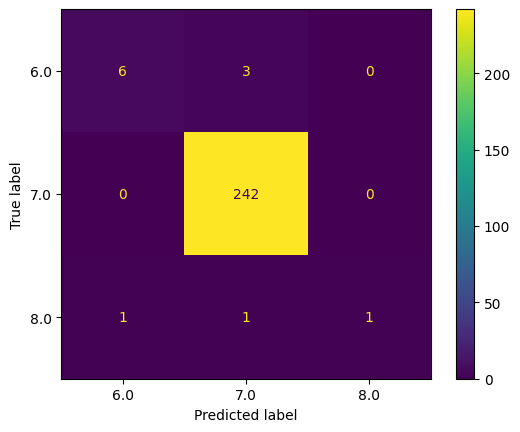

In [237]:
labels = merged_sans_nans_1_next["mood_avg_next"].round()
X = feature_merged_sans_nans_1.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = RandomForestClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

              precision    recall  f1-score   support

         6.0       0.86      0.67      0.75         9
         7.0       0.98      1.00      0.99       242
         8.0       1.00      0.33      0.50         3

    accuracy                           0.98       254
   macro avg       0.95      0.67      0.75       254
weighted avg       0.98      0.98      0.98       254



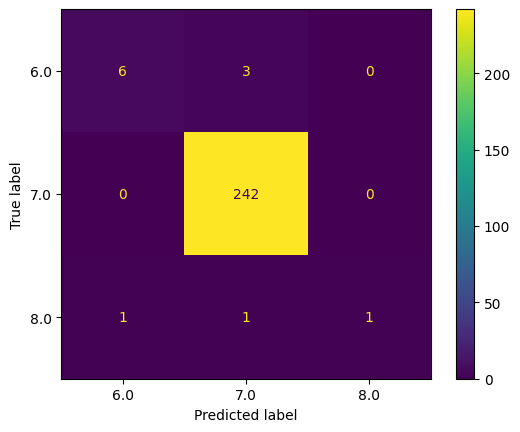

In [238]:
labels = merged_sans_nans_2_next["mood_avg_next"].round()
X = feature_merged_sans_nans_2.iloc[:, 2:]

y = np.array(labels, dtype=str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

m = RandomForestClassifier().fit(X_train, y_train)
y_pred = m.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()

In [ ]:
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]